## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Luciano
- Apellido: Chodaszewski
- Legajo: 1679405

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# Cargamos el dataset
diabetes_ds = pd.read_csv("C:/Users/lucia/Documents/UTN_2022/data_science/ClusterAI_TP_dataset_diabetes.csv")

In [3]:
diabetes_ds.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [4]:
print("El dataset tiene " + str(diabetes_ds.shape[1]) + " columnas y " + str(diabetes_ds.shape[0]) + " filas.")

El dataset tiene 9 columnas y 768 filas.


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [6]:
diabetes_ds['Outcome'].value_counts(normalize=True,dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
diabetes_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

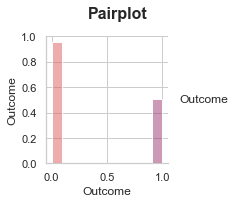

In [8]:
sns.set_theme(style="whitegrid")
vars = ['Outcome']
pairplot = sns.pairplot(diabetes_ds, hue = 'Outcome', diag_kind = 'hist', palette = 'flare', markers = ['o', 's'], vars = vars)
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.1, fontsize = '16', fontfamily = 'sans-serif')
plt.show()

##### **Conclusión:**</br>
La población sin diabetes es el doble respecto de la que efectivamente tiene.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

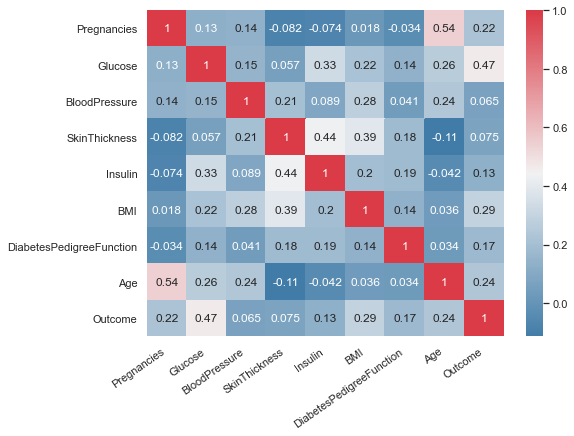

In [9]:
sns.set_theme(style="whitegrid")
corrmat = diabetes_ds.corr()
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
plt.show()

**Pares de variables con mayor correlación:** </br>
1. *Pregnancies* y *Age*
2. *Glucose* y *Outcome*

| Grupo | Tipo de Correlación | Valor |
| - | - | - |
| 1 | Positiva | 0.54 |
| 2 | Positiva | 0.47 |

De acuerdo a estos dos pares de variables correlacionadas podemos concluir que existe una linealidad positiva entre la glucosa y el hecho de tener diabetes, así también como para los embarazos y la edad. Esto implica que a mayor edad existe un mayor número de embarazos y que a mayor nivel de glucosa en sangre existe una mayor cantidad de diabéticos.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

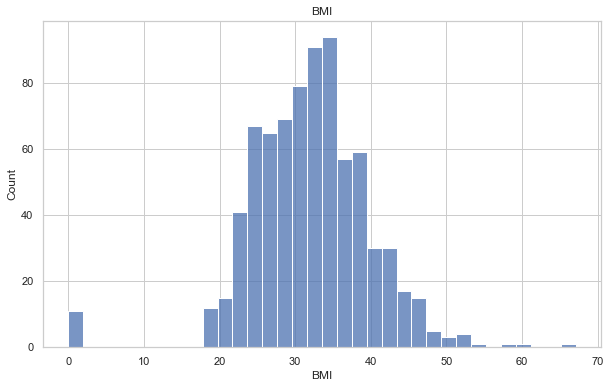

In [10]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=diabetes_ds, x="BMI", stat="count", edgecolor=None)
ax.set_title("BMI")
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

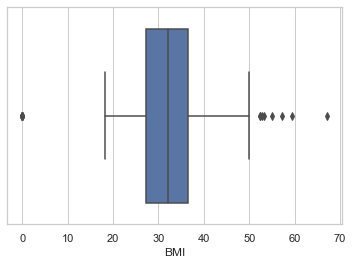

In [11]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="BMI", data=diabetes_ds)
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [12]:
percentile_sup = 0.99
filtering_sup = diabetes_ds['BMI'].quantile(percentile_sup)

percentile_inf = 0.01
filtering_inf = diabetes_ds['BMI'].quantile(percentile_inf)

In [13]:
print("Umbral superior: " + str(filtering_sup))
print("Umbral inferior: " + str(filtering_inf))

Umbral superior: 50.75900000000009
Umbral inferior: 0.0


In [14]:
diabetes_ds_filtered = diabetes_ds[(diabetes_ds["BMI"] <filtering_sup) & (diabetes_ds["BMI"] > filtering_inf)]

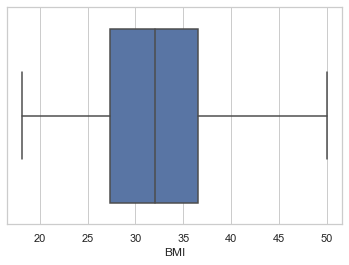

In [15]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="BMI", data=diabetes_ds_filtered)
plt.show()

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

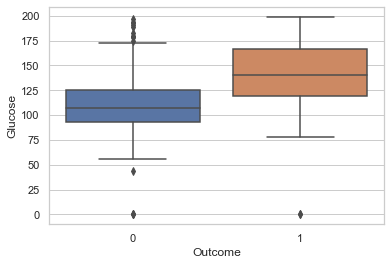

In [16]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_ds_filtered)
plt.show()

Se puede observar que la mediana del nivel de glucosa con *Outcome* igual a uno es mayor a la del grupo con *Outcome* igual a cero, es decir, que existe una correlación entre el nivel de glucosa y la diabetes. También se aprecia que hay más *outliers* para el *outcome* igual a cero, es decir que hay un par de casos apartados de personas con glucosa muy alta que no necesariamente tienen diabetes y no afectan a la mediana de la glucosa para la gente sin diabetes.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

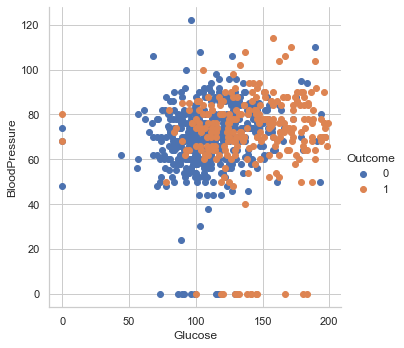

In [17]:
sns.set_theme(style="whitegrid")
sns.FacetGrid(diabetes_ds_filtered, hue="Outcome", height=5).map(plt.scatter, "Glucose", "BloodPressure").add_legend()
plt.show()

Existe una relación entre alto nivel de glucosa y presión sanguínea con tener diabetes, aunque no del todo marcada. Ambos grupos se encuentran superpuestos en la mayor parte de la distribución, por lo que si medimos solo estos dos *features* para determinar si una persona tiene diabetes o no, podríamos estar estimando de forma errónea su condición.

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [18]:
diabetes_ds_filtered.loc[(diabetes_ds_filtered['Age'] < 30), 'RangoEtario'] = 'Menor a 30 años'
diabetes_ds_filtered.loc[(diabetes_ds_filtered['Age'] > 30) & (diabetes_ds_filtered['Age'] < 40), 'RangoEtario'] = "Entre 30 y 40 años"
diabetes_ds_filtered.loc[(diabetes_ds_filtered['Age'] > 40), 'RangoEtario'] = 'Mayor a 40 años'

C:\Users\lucia\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lucia\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\lucia\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [19]:
diabetes_ds_filtered.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoEtario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

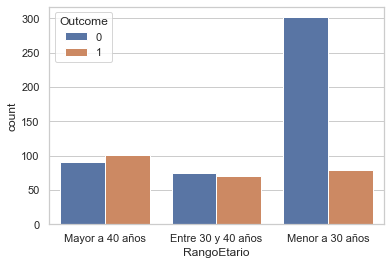

In [20]:
sns.set_theme(style="whitegrid")
sns.countplot(data=diabetes_ds_filtered, x="RangoEtario", hue="Outcome")
plt.show()

1. Para el grupo 'Menor a 30 años' la cantidad de personas con diabetes es muy inferior respecto a la que sí tiene.
2. Para los grupos 'Entre 30 y 40 años' y 'Mayor a 40' se ve una paridad entre las personas con y si diabetes con una relación al cercana al 50% para cada grupo.
